In [668]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [669]:
df_post = pd.read_csv('posts_test.csv', parse_dates = ['published_at'])
df_post.head()

,Unnamed: 0,id,project_id,blogger_id,type,type.1,status,published_at,network,blogger_subscribers
0,1,439641,351,80960,stories,cpa,published,2020-12-13 10:00:00,instagram,18285.0
1,2,187033,46,142138,stories,cpa,published,2020-08-10 21:00:00,instagram,15050.0
2,3,223710,282,80960,stories,cpa,published,2020-09-09 11:00:00,instagram,18285.0
3,6,367410,128,164818,stories,cpa,published,2020-11-18 13:00:00,instagram,158988.0
4,8,367791,113,244340,stories,cpa,published,2020-11-18 14:00:00,instagram,8684.0


In [670]:
df_users = pd.read_csv('users_test.csv', parse_dates = ['created_at'])
df_users.head()

,Unnamed: 0,user_id,blogger_id,role,created_at
0,182,183,2019,blogger,2019-05-21 11:08:17
1,183,184,11985,blogger,2019-05-21 13:31:29
2,184,185,20985,blogger,2019-05-21 14:08:35
3,185,186,20964,blogger,2019-05-21 14:28:06
4,186,187,22033,blogger,2019-05-21 14:33:11


In [671]:
df_post.nunique()

Unnamed: 0             391917
id                     391917
project_id                401
blogger_id              37398
type                        6
type.1                      3
status                      1
published_at            46476
network                     9
blogger_subscribers     21147
dtype: int64

In [672]:
df_post.isna().sum()

Unnamed: 0             0
id                     0
project_id             0
blogger_id             0
type                   0
type.1                 0
status                 0
published_at           0
network                0
blogger_subscribers    1
dtype: int64

In [673]:
df_post.drop(columns=['Unnamed: 0'], inplace=True)
df_post.rename(columns={"type.1": "type_1"}, inplace=True)

In [674]:
df_users.nunique() # Тут видим, что количество уникальных user_id превышает blogger_id (?)

Unnamed: 0    124664
user_id       124664
blogger_id    124165
role               1
created_at    124297
dtype: int64

In [675]:
df_users.isna().sum() # Здесь ответ на вопрос выше: "Куда делись blogger_id?" Ответ: их нет.

Unnamed: 0      0
user_id         0
blogger_id    499
role            0
created_at      0
dtype: int64

In [676]:
df_users = df_users.dropna() # Удаляем ненужную колонку и строчки с пустыми blogger_id
df_users.drop(columns=['Unnamed: 0'], inplace=True)

In [677]:
# Также можно заметить, что под одним user_id иногда зарегистрированы по несколько blogger_id, объединенных в одной строке.
# Преобразовываем эти строки в список, затем каждый элемент списка в отдельный ряд, при этом сами индексы строк дублируются.
df_users.blogger_id = df_users.blogger_id.apply(lambda x: x.split(',')) 
df_users = df_users.explode('blogger_id')

In [678]:
df_users.nunique() # Проверяем количество уникальных blogger_id

user_id       124165
blogger_id    135006
role               1
created_at    123800
dtype: int64

In [679]:
df_users.dtypes

user_id                int64
blogger_id            object
role                  object
created_at    datetime64[ns]
dtype: object

In [680]:
df_post.dtypes

id                              int64
project_id                      int64
blogger_id                      int64
type                           object
type_1                         object
status                         object
published_at           datetime64[ns]
network                        object
blogger_subscribers           float64
dtype: object

In [681]:
# Объединяем два датафрейма по колонке blogger_id, для этого переводим их в одинаковый тип 'int'
df_users.blogger_id = df_users.blogger_id.astype('int')
df_merge = df_post.merge(df_users, how='inner', on='blogger_id')

In [682]:
# Создаем новую колонку, где считаем время от момента регистрации до публикации. 
df_merge['days_since_published_at'] = df_merge.published_at - df_merge.created_at
df_merge.days_since_published_at = df_merge.days_since_published_at.dt.days

In [684]:
df_merge.head()

,id,project_id,blogger_id,type,type_1,status,published_at,network,blogger_subscribers,user_id,role,created_at,days_since_published_at
0,439641,351,80960,stories,cpa,published,2020-12-13 10:00:00,instagram,18285.0,11014,blogger,2019-11-20 13:00:29,388
1,223710,282,80960,stories,cpa,published,2020-09-09 11:00:00,instagram,18285.0,11014,blogger,2019-11-20 13:00:29,293
2,273572,282,80960,stories,cpa,published,2020-10-13 11:00:00,instagram,18285.0,11014,blogger,2019-11-20 13:00:29,327
3,304789,282,80960,stories,cpa,published,2020-10-27 15:00:00,instagram,18285.0,11014,blogger,2019-11-20 13:00:29,342
4,302189,282,80960,stories,cpa,published,2020-10-26 16:00:00,instagram,18285.0,11014,blogger,2019-11-20 13:00:29,341


In [685]:
# Месяц регистрации выделяем в отдельную колонку.
df_merge['month_created_at'] = df_merge.created_at.apply(lambda x: x.strftime("%m"))
df_merge.head()

,id,project_id,blogger_id,type,type_1,status,published_at,network,blogger_subscribers,user_id,role,created_at,days_since_published_at,month_created_at
0,439641,351,80960,stories,cpa,published,2020-12-13 10:00:00,instagram,18285.0,11014,blogger,2019-11-20 13:00:29,388,11
1,223710,282,80960,stories,cpa,published,2020-09-09 11:00:00,instagram,18285.0,11014,blogger,2019-11-20 13:00:29,293,11
2,273572,282,80960,stories,cpa,published,2020-10-13 11:00:00,instagram,18285.0,11014,blogger,2019-11-20 13:00:29,327,11
3,304789,282,80960,stories,cpa,published,2020-10-27 15:00:00,instagram,18285.0,11014,blogger,2019-11-20 13:00:29,342,11
4,302189,282,80960,stories,cpa,published,2020-10-26 16:00:00,instagram,18285.0,11014,blogger,2019-11-20 13:00:29,341,11


In [687]:
# Создаем категории публикаций блогеров в первые 7, 14, 30, 60 дней с момента регистрации.
# Данные, не вошедшие в эти категории далее в расчет брать не будем, в колонке 'categorial' они будут обозначаться как NaN.
bins = pd.IntervalIndex.from_tuples([(-1, 7), (7, 14), (14, 30), (30, 60)])
x = pd.cut(df_merge.days_since_published_at.to_list(), bins)
x.categories = ['0-7 days', '7-14 days', '14-30 days', '30-60 days']
df_merge['categorial'] = x
df_merge.head()

,id,project_id,blogger_id,type,type_1,status,published_at,network,blogger_subscribers,user_id,role,created_at,days_since_published_at,month_created_at,categorial
0,439641,351,80960,stories,cpa,published,2020-12-13 10:00:00,instagram,18285.0,11014,blogger,2019-11-20 13:00:29,388,11,NaN
1,223710,282,80960,stories,cpa,published,2020-09-09 11:00:00,instagram,18285.0,11014,blogger,2019-11-20 13:00:29,293,11,NaN
2,273572,282,80960,stories,cpa,published,2020-10-13 11:00:00,instagram,18285.0,11014,blogger,2019-11-20 13:00:29,327,11,NaN
3,304789,282,80960,stories,cpa,published,2020-10-27 15:00:00,instagram,18285.0,11014,blogger,2019-11-20 13:00:29,342,11,NaN
4,302189,282,80960,stories,cpa,published,2020-10-26 16:00:00,instagram,18285.0,11014,blogger,2019-11-20 13:00:29,341,11,NaN


In [688]:
# Из предыдущего датафрейма отбираем только публикации в первые 60 дней и по СРА.
df_cpa = df_merge.query('type_1 == "cpa" and categorial in ["0-7 days", "7-14 days", "14-30 days", "30-60 days"]')
df_cpa

,id,project_id,blogger_id,type,type_1,status,published_at,network,blogger_subscribers,user_id,role,created_at,days_since_published_at,month_created_at,categorial
327,51413,176,80960,stories,cpa,published,2020-01-15 14:00:00,instagram,18285.0,11014,blogger,2019-11-20 13:00:29,56,11,30-60 days
343,52218,176,80960,stories,cpa,published,2020-01-15 13:00:00,instagram,18285.0,11014,blogger,2019-11-20 13:00:29,55,11,30-60 days
527,49093,60,80960,stories,cpa,published,2020-01-03 08:00:00,instagram,18285.0,11014,blogger,2019-11-20 13:00:29,43,11,30-60 days
617,52256,60,80960,stories,cpa,published,2020-01-14 00:00:00,instagram,18285.0,11014,blogger,2019-11-20 13:00:29,54,11,30-60 days
2697,79578,262,164818,stories,cpa,published,2020-04-02 14:00:00,instagram,158988.0,17520,blogger,2020-02-03 19:16:04,58,02,30-60 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385196,479641,403,605095,post,cpa,published,2020-12-28 16:00:00,tiktok,21200.0,132545,blogger,2020-12-26 05:16:51,2,12,0-7 days
385197,482718,504,475682,post,cpa,published,2020-12-30 10:00:00,vk,709493.0,133008,blogger,2020-12-27 14:59:26,2,12,0-7 days
385198,485999,504,475682,post,cpa,published,2020-12-31 09:00:00,vk,709493.0,133008,blogger,2020-12-27 14:59:26,3,12,0-7 days
385200,484151,430,608294,post,cpa,published,2020-12-30 13:00:00,vk,12692.0,133800,blogger,2020-12-29 22:03:52,0,12,0-7 days


In [689]:
# Здесь посчитано количество публикаций в первые 7 дней после регистарации.
df_cpa.query('categorial in ["0-7 days"]').groupby('month_created_at', as_index=False).blogger_id.count()

,month_created_at,blogger_id
0,01,656
1,02,886
2,03,1235
3,04,1088
4,05,1979
5,06,1747
6,07,2280
7,08,1932
8,09,1854
9,10,2913


In [690]:
# Здесь посчитано количество уникальных блогеров, сделавших публикации в первые 7 дней после регистарации.
df_cpa.query('categorial in ["0-7 days"]').groupby('month_created_at', as_index=False).blogger_id.nunique()

,month_created_at,blogger_id
0,01,575
1,02,810
2,03,1050
3,04,865
4,05,1437
5,06,1287
6,07,1454
7,08,1480
8,09,1346
9,10,1803


In [691]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(12,8)}
        )

Text(0.5, 1.0, 'Количество рекламных публикаций в первые 7 дней (СРА)')

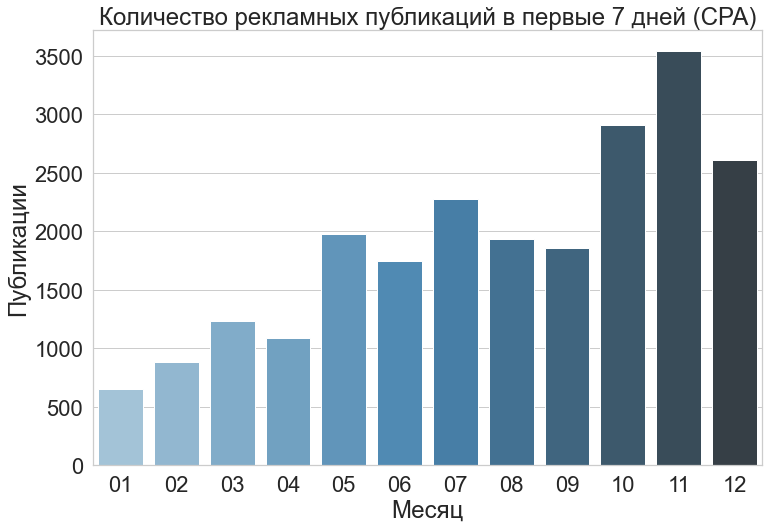

In [692]:
# График количества публикаций в первые 7 дней после регистарации.
sns.barplot(x='month_created_at', y='blogger_id', \
            data = df_cpa.query('categorial in ["0-7 days"]') \
                .groupby('month_created_at', as_index=False) \
                .blogger_id.count(), palette="Blues_d")

plt.xlabel('Месяц')
plt.ylabel('Публикации')
plt.title('Количество рекламных публикаций в первые 7 дней (СРА)') 

Text(0.5, 1.0, 'Блогеры, сделавшие публикации в первые 7 дней после регистрации. (СРА)')

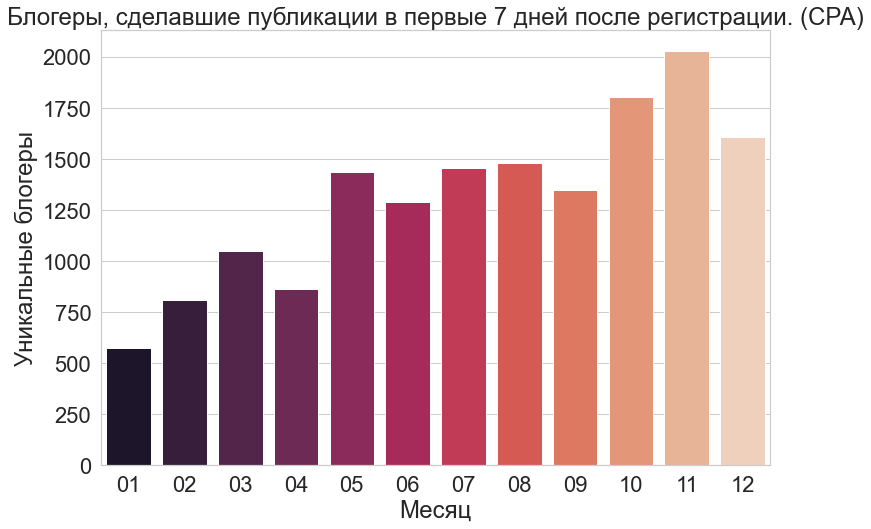

In [693]:
sns.barplot(x='month_created_at', y='blogger_id', \
            data = df_cpa.query('categorial in ["0-7 days"]') \
                .groupby('month_created_at', as_index=False) \
                .blogger_id.nunique(), palette="rocket")
plt.xlabel('Месяц')
plt.ylabel('Уникальные блогеры')
plt.title('Блогеры, сделавшие публикации в первые 7 дней после регистрации. (СРА)') 

In [694]:
# количество публикаций в первые 14 дней после регистарации.
df_cpa.query('categorial in ["0-7 days", "7-14 days"]').groupby('month_created_at', as_index=False).blogger_id.count()

,month_created_at,blogger_id
0,01,841
1,02,1284
2,03,1693
3,04,1444
4,05,2770
5,06,2542
6,07,3403
7,08,2756
8,09,2657
9,10,4667


In [695]:
# количество уникальных блогеров, сделавших публикации в первые 14 дней после регистарации.
df_cpa.query('categorial in ["0-7 days", "7-14 days"]').groupby('month_created_at', as_index=False).blogger_id.nunique()

,month_created_at,blogger_id
0,01,658
1,02,1052
2,03,1299
3,04,999
4,05,1623
5,06,1506
6,07,1701
7,08,1753
8,09,1539
9,10,2192


Text(0.5, 1.0, 'Количество рекламных публикаций в первые 14 дней (СРА)')

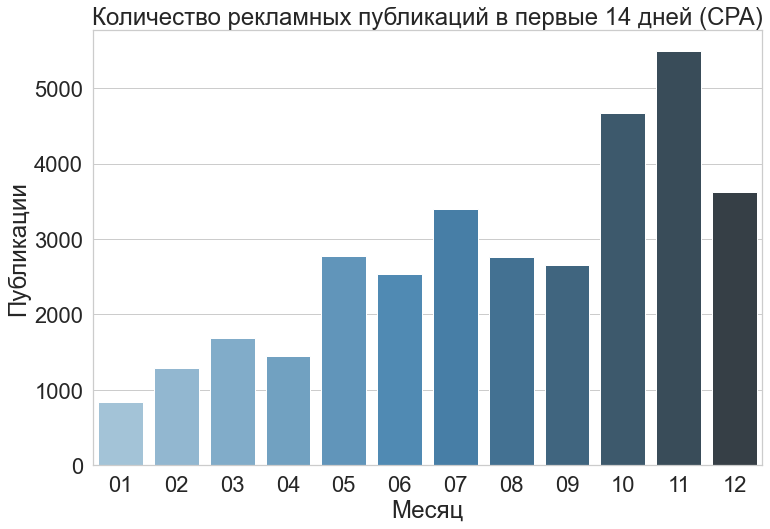

In [696]:
sns.barplot(x='month_created_at', y='blogger_id', \
            data = df_cpa.query('categorial in ["0-7 days", "7-14 days"]') \
                .groupby('month_created_at', as_index=False) \
                .blogger_id.count(), palette="Blues_d")
plt.xlabel('Месяц')
plt.ylabel('Публикации')
plt.title('Количество рекламных публикаций в первые 14 дней (СРА)') 

Text(0.5, 1.0, 'Блогеры, сделавшие публикации в первые 14 дней после регистрации. (СРА)')

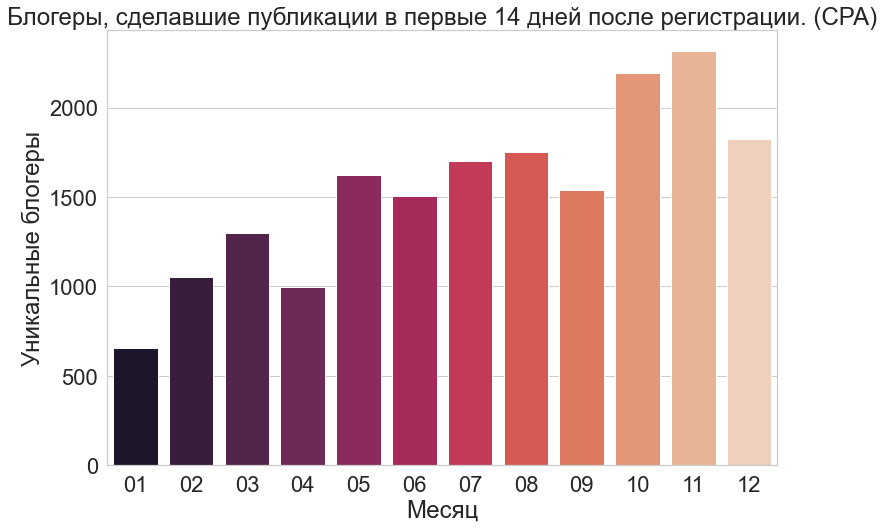

In [697]:
sns.barplot(x='month_created_at', y='blogger_id', \
            data = df_cpa.query('categorial in ["0-7 days", "7-14 days"]') \
                .groupby('month_created_at', as_index=False) \
                .blogger_id.nunique(), palette="rocket")
plt.xlabel('Месяц')
plt.ylabel('Уникальные блогеры')
plt.title('Блогеры, сделавшие публикации в первые 14 дней после регистрации. (СРА)') 

In [698]:
# количество публикаций в первые 30 дней после регистарации.
df_cpa.query('categorial in ["0-7 days", "7-14 days", "14-30 days"]'). \
            groupby('month_created_at', as_index=False).blogger_id.count()

,month_created_at,blogger_id
0,01,1137
1,02,1874
2,03,2293
3,04,2211
4,05,4506
5,06,4166
6,07,5494
7,08,4079
8,09,4250
9,10,8487


In [699]:
# количество уникальных блогеров, сделавших публикации в первые 30 дней после регистарации.
df_cpa.query('categorial in ["0-7 days", "7-14 days", "14-30 days"]'). \
            groupby('month_created_at', as_index=False).blogger_id.nunique()

,month_created_at,blogger_id
0,01,741
1,02,1275
2,03,1510
3,04,1155
4,05,1828
5,06,1684
6,07,1940
7,08,2017
8,09,1821
9,10,2531


Text(0.5, 1.0, 'Количество рекламных публикаций в первые 30 дней (СРА)')

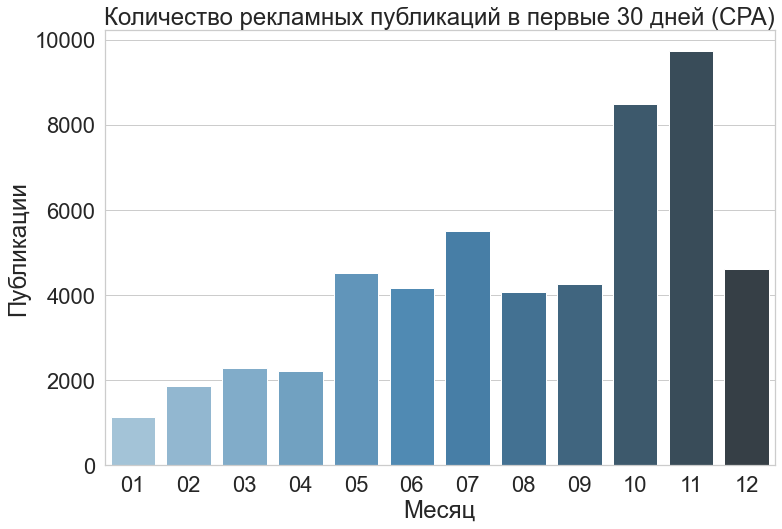

In [700]:
sns.barplot(x='month_created_at', y='blogger_id', \
            data = df_cpa.query('categorial in ["0-7 days", "7-14 days", "14-30 days"]') \
                .groupby('month_created_at', as_index=False) \
                .blogger_id.count(), palette="Blues_d")
plt.xlabel('Месяц')
plt.ylabel('Публикации')
plt.title('Количество рекламных публикаций в первые 30 дней (СРА)') 

Text(0.5, 1.0, 'Блогеры, сделавшие публикации в первые 30 дней после регистрации. (СРА)')

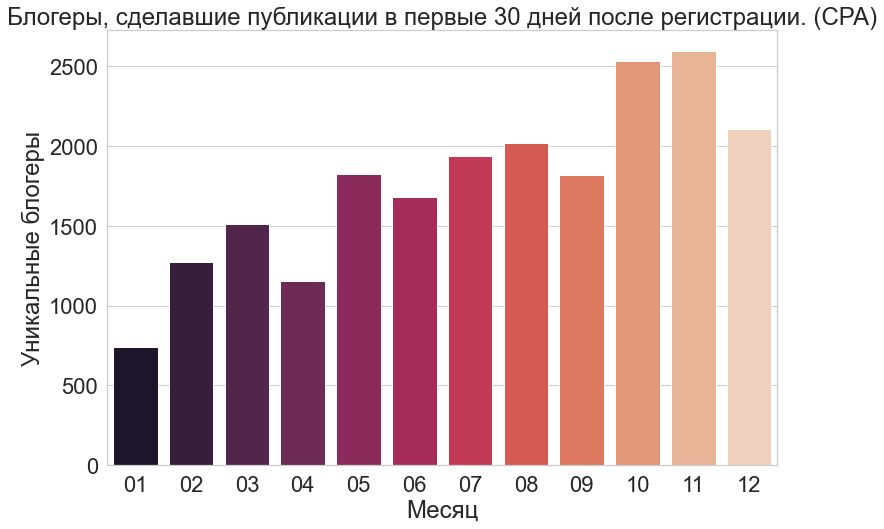

In [701]:
sns.barplot(x='month_created_at', y='blogger_id', \
            data = df_cpa.query('categorial in ["0-7 days", "7-14 days", "14-30 days"]') \
                .groupby('month_created_at', as_index=False) \
                .blogger_id.nunique(), palette="rocket")
plt.xlabel('Месяц')
plt.ylabel('Уникальные блогеры')
plt.title('Блогеры, сделавшие публикации в первые 30 дней после регистрации. (СРА)') 

In [702]:
# количество публикаций в первые 60 дней после регистарации.
df_cpa.query('categorial in ["0-7 days", "7-14 days", "14-30 days", "30-60 days"]'). \
            groupby('month_created_at', as_index=False).blogger_id.count()

,month_created_at,blogger_id
0,01,1648
1,02,2711
2,03,3419
3,04,3389
4,05,7837
5,06,6763
6,07,9032
7,08,6480
8,09,8312
9,10,15670


In [703]:
# количество уникальных блогеров, сделавших публикации в первые 60 дней после регистарации.
df_cpa.query('categorial in ["0-7 days", "7-14 days", "14-30 days", "30-60 days"]'). \
            groupby('month_created_at', as_index=False).blogger_id.nunique()

,month_created_at,blogger_id
0,01,816
1,02,1428
2,03,1701
3,04,1251
4,05,1973
5,06,1832
6,07,2089
7,08,2196
8,09,2066
9,10,2818


Text(0.5, 1.0, 'Количество рекламных публикаций в первые 60 дней (СРА)')

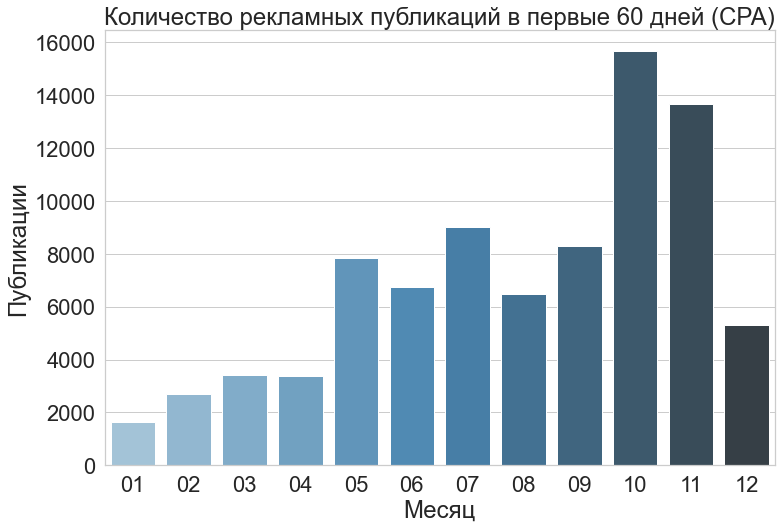

In [704]:
sns.barplot(x='month_created_at', y='blogger_id', \
            data = df_cpa.query('categorial in ["0-7 days", "7-14 days", "14-30 days", "30-60 days"]') \
                .groupby('month_created_at', as_index=False) \
                .blogger_id.count(), palette="Blues_d")
plt.xlabel('Месяц')
plt.ylabel('Публикации')
plt.title('Количество рекламных публикаций в первые 60 дней (СРА)') 

Text(0.5, 1.0, 'Блогеры, сделавшие публикации в первые 60 дней после регистрации. (СРА)')

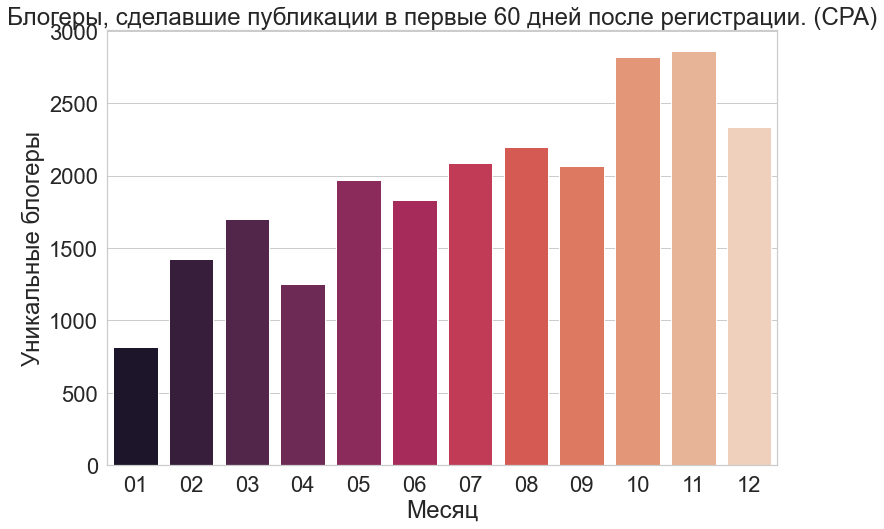

In [705]:
sns.barplot(x='month_created_at', y='blogger_id', \
            data = df_cpa.query('categorial in ["0-7 days", "7-14 days", "14-30 days", "30-60 days"]') \
                .groupby('month_created_at', as_index=False) \
                .blogger_id.nunique(), palette="rocket")
plt.xlabel('Месяц')
plt.ylabel('Уникальные блогеры')
plt.title('Блогеры, сделавшие публикации в первые 60 дней после регистрации. (СРА)') 

Таким образом, в течение всех первых 60 дней максимальное количество ЛЮБЫХ публикаций приходится на блогеров, зарегистрировавшихся в октябре и ноябре. На эти же месяцы приходится максимальное количество публикаций от УНИКАЛЬНЫХ блогеров также в течение всех первых 60 дней. Возможные факторы: Большой приток именно в эти месяцы блогеров на платформу? Увеличение количества предложений рекламных интеграций?

Text(0.5, 1.0, 'Количество публикаций с разбивкой по временным интервалам (CPA)')

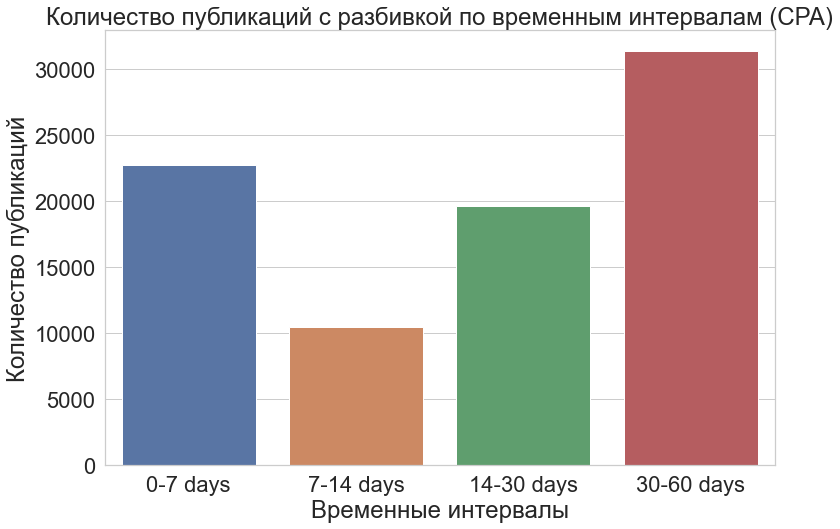

In [706]:
#Если не брать в расчет разбивку по месяцам,а посмотреть на количество рекламных публикаций с разбивкой по временным интервалам
# Можно заметить, что наибольшее количество публикаций приходится на промежуток свыше месяца после регистрации.
sns.countplot(data=df_cpa, x=df_cpa.categorial)
plt.xlabel('Временные интервалы')
plt.ylabel('Количество публикаций')
plt.title('Количество публикаций с разбивкой по временным интервалам (CPA)') 

Теперь то же самое, но с проектами на СРР.

In [707]:
# Отбираем только публикации в первые 60 дней и по СРР.
df_cpp = df_merge.query('type_1 == "cpp" and categorial in ["0-7 days", "7-14 days", "14-30 days", "30-60 days"]')
df_cpp

,id,project_id,blogger_id,type,type_1,status,published_at,network,blogger_subscribers,user_id,role,created_at,days_since_published_at,month_created_at,categorial
5731,151632,286,6950,stories,cpp,published,2020-07-14 14:00:00,instagram,73931.0,53036,blogger,2020-05-31 21:38:54,43,05,30-60 days
5733,150733,306,6950,stories,cpp,published,2020-07-21 11:00:00,instagram,73931.0,53036,blogger,2020-05-31 21:38:54,50,05,30-60 days
25771,115103,359,166379,ps,cpp,published,2020-06-03 16:36:45,instagram,14718.0,40612,blogger,2020-04-15 18:55:02,48,04,30-60 days
64991,174875,286,273119,stories,cpp,published,2020-07-31 13:00:00,instagram,27835.0,56298,blogger,2020-06-10 20:55:30,50,06,30-60 days
86222,200591,434,132831,ps,cpp,published,2020-08-24 12:54:06,instagram,26392.0,67523,blogger,2020-07-11 11:02:25,44,07,30-60 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384360,451996,337,584519,post,cpp,published,2020-12-18 19:00:00,tiktok,145800.0,128428,blogger,2020-12-15 17:11:22,3,12,0-7 days
384466,60177,198,21848,post,cpp,published,2020-02-12 13:17:37,instagram,251456.0,17796,blogger,2020-02-06 11:31:57,6,02,0-7 days
384521,68852,252,140166,post,cpp,published,2020-03-07 16:00:00,telegram,12016.0,23764,blogger,2020-03-06 18:22:46,0,03,0-7 days
384599,85717,26,241055,ps,cpp,published,2020-04-24 14:50:58,instagram,12682.0,40205,blogger,2020-04-13 23:26:52,10,04,7-14 days


Далее будут только графики количества публикаций (от неуникальных блогеров) по месяцам (СРР).

In [708]:
# Количество публикаций в первые 7 дней после регистарации.
df_cpp.query('categorial in ["0-7 days"]').groupby('month_created_at', as_index=False).blogger_id.count()

,month_created_at,blogger_id
0,01,11
1,02,85
2,03,37
3,04,52
4,05,94
5,06,15
6,07,19
7,08,68
8,09,81
9,10,59


Text(0.5, 1.0, 'Количество рекламных публикаций в первые 7 дней (СРР)')

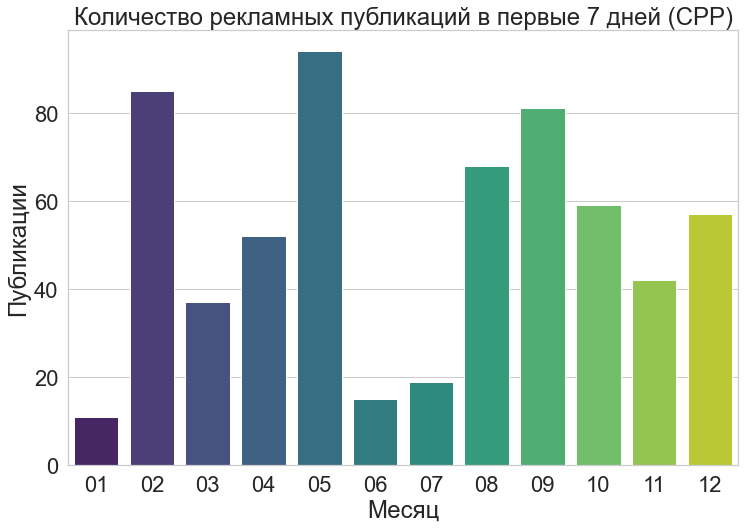

In [709]:
# График количества публикаций в первые 7 дней после регистарации.
sns.barplot(x='month_created_at', y='blogger_id', \
            data = df_cpp.query('categorial in ["0-7 days"]') \
                .groupby('month_created_at', as_index=False) \
                .blogger_id.count(), palette="viridis")

plt.xlabel('Месяц')
plt.ylabel('Публикации')
plt.title('Количество рекламных публикаций в первые 7 дней (СРР)') 

In [710]:
df_cpp.query('categorial in ["0-7 days", "7-14 days"]'). \
            groupby('month_created_at', as_index=False).blogger_id.count()

,month_created_at,blogger_id
0,01,20
1,02,99
2,03,52
3,04,72
4,05,115
5,06,16
6,07,26
7,08,84
8,09,97
9,10,68


Text(0.5, 1.0, 'Количество рекламных публикаций в первые 14 дней (СРР)')

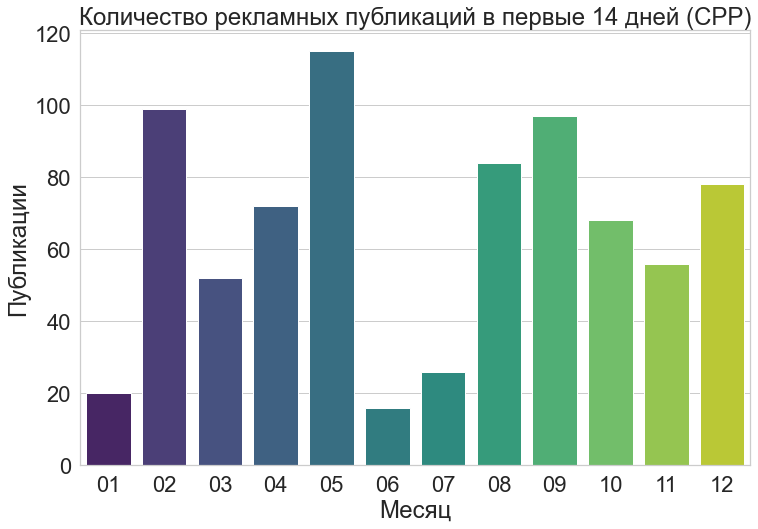

In [711]:
# График количества публикаций в первые 14 дней после регистарации.
sns.barplot(x='month_created_at', y='blogger_id', \
            data = df_cpp.query('categorial in ["0-7 days", "7-14 days"]') \
                .groupby('month_created_at', as_index=False) \
                .blogger_id.count(), palette="viridis")

plt.xlabel('Месяц')
plt.ylabel('Публикации')
plt.title('Количество рекламных публикаций в первые 14 дней (СРР)') 

In [712]:
df_cpp.query('categorial in ["0-7 days", "7-14 days", "14-30 days"]'). \
            groupby('month_created_at', as_index=False).blogger_id.count()

,month_created_at,blogger_id
0,01,35
1,02,128
2,03,79
3,04,82
4,05,125
5,06,18
6,07,51
7,08,115
8,09,109
9,10,88


Text(0.5, 1.0, 'Количество рекламных публикаций в первые 30 дней (СРР)')

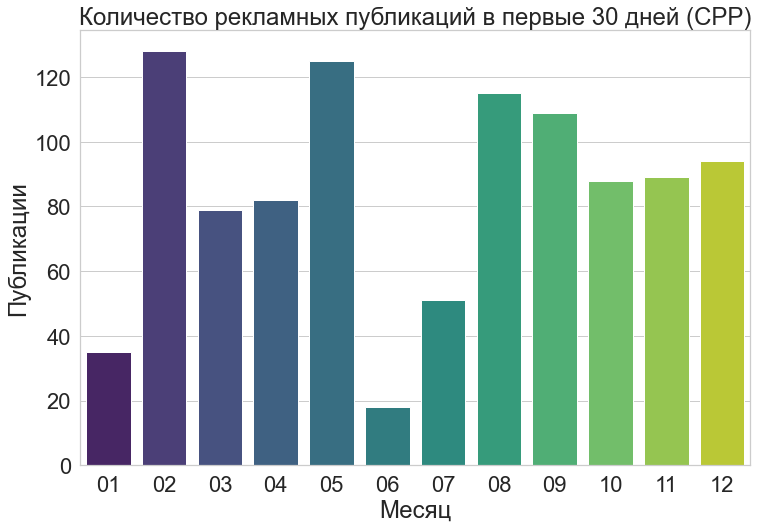

In [713]:
# График количества публикаций в первые 30 дней после регистарации.
sns.barplot(x='month_created_at', y='blogger_id', \
            data = df_cpp.query('categorial in ["0-7 days", "7-14 days", "14-30 days"]') \
                .groupby('month_created_at', as_index=False) \
                .blogger_id.count(), palette="viridis")

plt.xlabel('Месяц')
plt.ylabel('Публикации')
plt.title('Количество рекламных публикаций в первые 30 дней (СРР)') 

In [714]:
df_cpp.query('categorial in ["0-7 days", "7-14 days", "14-30 days", "30-60 days"]'). \
            groupby('month_created_at', as_index=False).blogger_id.count()

,month_created_at,blogger_id
0,01,57
1,02,150
2,03,98
3,04,95
4,05,138
5,06,51
6,07,103
7,08,139
8,09,123
9,10,127


Text(0.5, 1.0, 'Количество рекламных публикаций в первые 60 дней (СРР)')

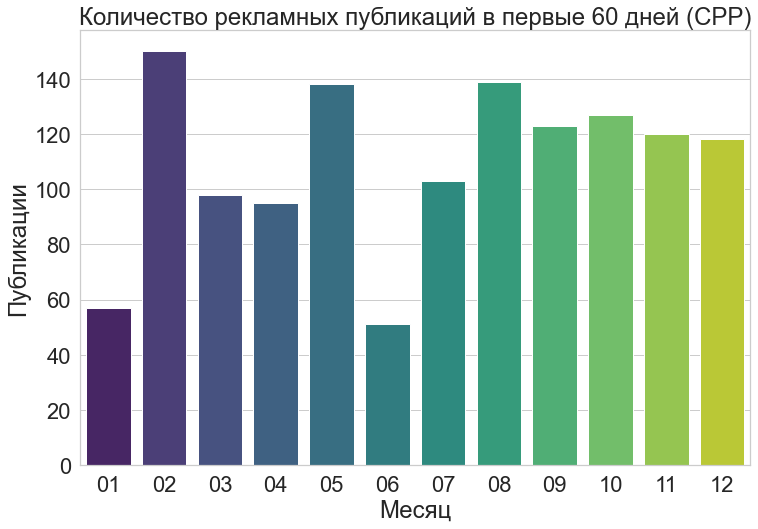

In [715]:
# График количества публикаций в первые 60 дней после регистарации.
sns.barplot(x='month_created_at', y='blogger_id', \
            data = df_cpp.query('categorial in ["0-7 days", "7-14 days", "14-30 days", "30-60 days"]') \
                .groupby('month_created_at', as_index=False) \
                .blogger_id.count(), palette="viridis")

plt.xlabel('Месяц')
plt.ylabel('Публикации')
plt.title('Количество рекламных публикаций в первые 60 дней (СРР)') 

Text(0.5, 1.0, 'Количество публикаций с разбивкой по временным интервалам (CPP)')

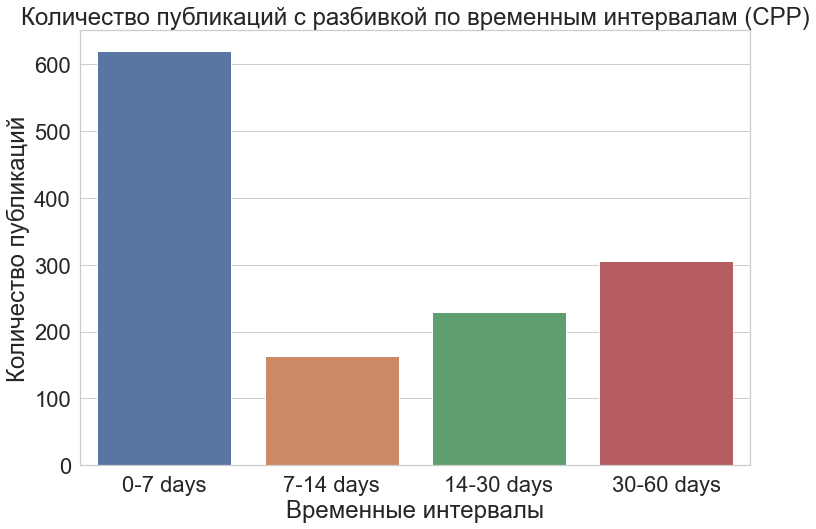

In [716]:
#Если посмотреть на количество рекламных публикаций с разбивкой по временным интервалам без разбивки по месяцам
# Можно заметить, что наибольшее количество публикаций приходится на промежуток до 7 дней с момента регистрации.
sns.countplot(data=df_cpp, x=df_cpp.categorial)
plt.xlabel('Временные интервалы')
plt.ylabel('Количество публикаций')
plt.title('Количество публикаций с разбивкой по временным интервалам (CPP)') 

P.S. Есть строки, где 'days_since_published_at' является отрицательным числом. То есть блогер сделал публикацию раньше, чем была его регистрация. Они не вошли в исследуемую выборку, но тем не менее их немало. (???)

In [717]:
df_merge.query('days_since_published_at < 0')

,id,project_id,blogger_id,type,type_1,status,published_at,network,blogger_subscribers,user_id,role,created_at,days_since_published_at,month_created_at,categorial
17875,57975,105,147866,post,cpa,published,2020-02-07 17:43:52,instagram,16337.0,21903,blogger,2020-02-28 15:59:33,-21,02,NaN
25256,302466,105,269639,stories,cpa,published,2020-10-26 16:00:00,instagram,5515.0,109173,blogger,2020-10-29 21:02:38,-4,10,NaN
25260,312418,105,269639,stories,cpa,published,2020-10-29 17:00:00,instagram,5515.0,109173,blogger,2020-10-29 21:02:38,-1,10,NaN
25266,205386,105,269639,stories,cpa,published,2020-08-25 15:00:00,instagram,5515.0,109173,blogger,2020-10-29 21:02:38,-66,10,NaN
25267,284024,105,269639,post,cpa,published,2020-10-19 20:52:55,instagram,5515.0,109173,blogger,2020-10-29 21:02:38,-11,10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385162,454931,282,590940,stories,cpa,published,2020-12-20 09:00:00,instagram,4285.0,130226,blogger,2020-12-20 14:22:00,-1,12,NaN
385166,458742,32,594953,post,cpa,published,2020-12-20 16:00:00,tiktok,5121.0,130273,blogger,2020-12-20 16:50:12,-1,12,NaN
385169,459531,176,463028,post,cpa,published,2020-12-20 12:00:00,tiktok,12500.0,130360,blogger,2020-12-20 21:11:39,-1,12,NaN
385172,460553,32,288561,post,cpa,published,2020-12-21 19:00:00,tiktok,5694.0,130877,blogger,2020-12-21 19:50:19,-1,12,NaN
